Pymaceutical Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st

# Study data files
mouse_metadata_path = Path("C:/Users/Karamjit/Documents/Mouse_metadata.csv")
study_results_path =  Path("C:/Users/Karamjit/Documents/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceutical_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceutical_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(pymaceutical_complete['Mouse ID']))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = pymaceutical_complete[pymaceutical_complete[['Mouse ID', 'Timepoint']].duplicated()==True]

mice_id = mice_duplicate["Mouse ID"].unique()
#mice_duplicate = pymaceutical_complete[pymaceutical_complete['Mouse ID'].duplicated()]
mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = pymaceutical_complete.loc[pymaceutical_complete["Mouse ID"] == 'g989', :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_pymaceutical = pymaceutical_complete.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_pymaceutical = pymaceutical_complete.loc[pymaceutical_complete["Mouse ID"] != 'g989']
clean_pymaceutical

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(pd.unique(clean_pymaceutical['Mouse ID']))
clean_mice_count

248

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_volume_mean = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_volume_median = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_var = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_sd = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sem = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                   "Median Tumor Volume": tumor_volume_median,
                                   "Tumor Volume Variance": tumor_volume_var,
                                   "Tumor Volume Std Dev": tumor_volume_sd,
                                   "Tumor Volume Std Err": tumor_volume_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistic_aggregation = clean_pymaceutical.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistic_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

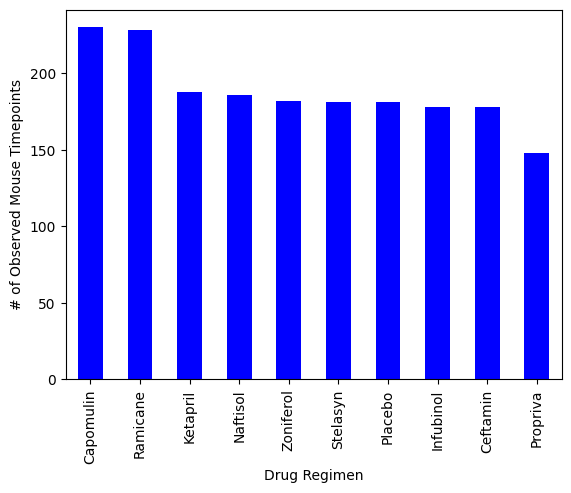

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
micedrug_count = clean_pymaceutical[["Drug Regimen", "Timepoint"]]
drug_count = micedrug_count['Drug Regimen'].value_counts()
drug_count.plot(kind = "bar", color = "b", xlabel= "Drug Regimen", ylabel="# of Observed Mouse Timepoints")

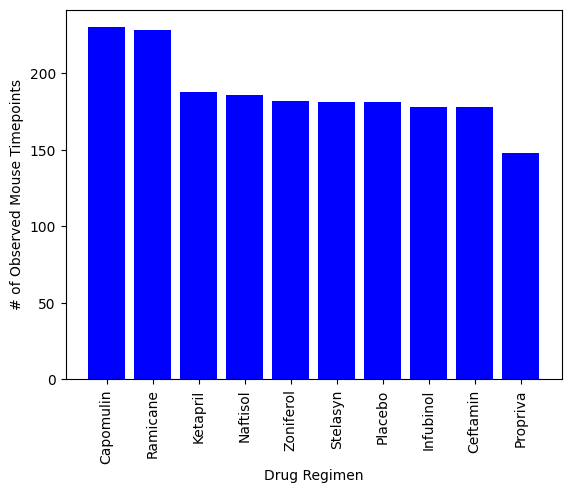

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values
plt.bar(x_axis, y_axis, color = "b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

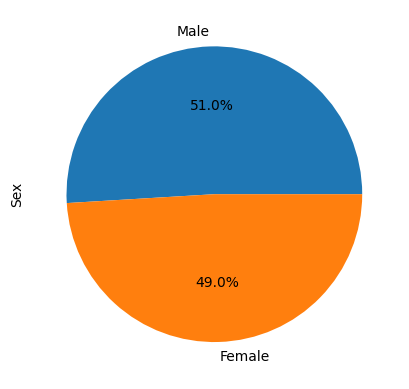

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_pymaceutical.groupby(['Sex'])['Mouse ID'].count()
sex_distribution = sex_distribution.sort_values(ascending=False)
sex_distribution.plot.pie(autopct ="%1.1F%%", ylabel = "Sex")

plt.show()

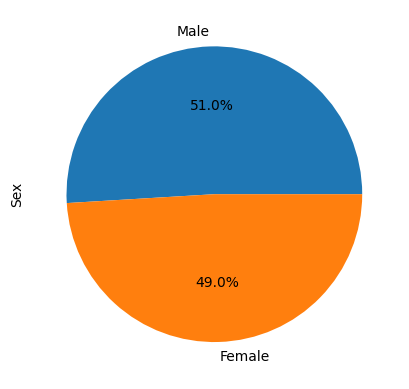

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = ["Male", "Female"]
plt.pie(sex_distribution, labels=sex_label, autopct ="%1.1F%%", startangle=0)
plt.ylabel("Sex")
plt.show()

Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
capomulin = clean_pymaceutical.loc[clean_pymaceutical['Drug Regimen']=='Capomulin']
ramicane = clean_pymaceutical.loc[clean_pymaceutical['Drug Regimen']=='Ramicane']
infubinol = clean_pymaceutical.loc[clean_pymaceutical['Drug Regimen']=='Infubinol']
ceftamin = clean_pymaceutical.loc[clean_pymaceutical['Drug Regimen']=='Ceftamin']

capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']

capomulin_vol = pd.DataFrame(capomulin_last)
ramicane_vol = pd.DataFrame(ramicane_last)
infubinol_vol = pd.DataFrame(infubinol_last)
ceftamin_vol = pd.DataFrame(ceftamin_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_merge = pd.merge(capomulin_vol, clean_pymaceutical, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge = pd.merge(ramicane_vol, clean_pymaceutical, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge = pd.merge(infubinol_vol, clean_pymaceutical, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge = pd.merge(ceftamin_vol, clean_pymaceutical, on=("Mouse ID","Timepoint"),how="left")

all_four = [capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge]
all_four

[   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 0      b128         45           38.982878                 2    Capomulin   
 1      b742         45           38.939633                 0    Capomulin   
 2      f966         20           30.485985                 0    Capomulin   
 3      g288         45           37.074024                 1    Capomulin   
 4      g316         45           40.159220                 2    Capomulin   
 5      i557         45           47.685963                 1    Capomulin   
 6      i738         45           37.311846                 2    Capomulin   
 7      j119         45           38.125164                 1    Capomulin   
 8      j246         35           38.753265                 1    Capomulin   
 9      l509         45           41.483008                 3    Capomulin   
 10     l897         45           38.846876                 1    Capomulin   
 11     m601         45           28.430964                 1   

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

# Determine outliers using upper and lower bounds